# MGTA611: Interim Report - Breast Cancer Tumor Classification

## Introduction

Breast cancer detection has always been a major issue for the pathologists and medical practitioners for diagnosis and treatment planning. The manual identification of cancer from microscopic biopsy images is subjective in nature and may vary from expert to expert depending on their expertise and other factors which include lack of specific and accurate quantitative measures to classify the biopsy images as normal or cancerous one. 

For this project, we aim to use Deep Learning to classify microscopic images of breast tumor tissue into benign or malignant categories in order to fascilitate a speedy workflow in the diagnosis and treatment, if need be, of breast cancer. Traditioanally, we know that the distinction between the two have been at times a daunting task for pathologists, resulting in the conservative approach of going the treatment route for a patient that may not have otherwise needed  treatment. The objective of this project is to use Convolutional Neural Networks in order to create a higher level of confidence in both the diagnosis as well as the treatment of these varying cases. Through this process, we aim to reduce both the emotional trauma as well as the costs associated with undergoing such treatments in cases observing benign tumors.

In this report we have shown our efforts to increase the accuracy through the Neural Nets. However, for our final metrics we aim to look at not only the prediction accuracy on our testing data, but also pay particular attention to the precision of true positives (TP), true negatives (TN), false positive (FP) and false negative (FN).


## Dataset

The dataset was obtained from The Breast Cancer Histopathological Image Classification (BreakHis). It is composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X). It contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format). This database has been built in collaboration with the P&D Laboratory – Pathological Anatomy and Cytopathology, Parana, Brazil. The dataset BreaKHis is divided into two main groups: benign tumors (i.e. non-cancerous) and malignant tumors (i.e. cancerous). Link to data set: https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/

## Readability of workflow 

We aim to provide additional info in the code block where it is necessary and use a textblock for major findings and change of direction or approach throughout this report for increased readability. As our first step we will be importing needed libraries and reading the data, followed by splitting and following the dataset, building a traditional model and running it as a benchmark, and finally moving on to the Convolutional NN. The final steps include adding augmentation and discussing our future steps in order to enhance our model through tuning hyper-parameter and model design, investigating optimal ways to split the data into train/test and benign/malignat as well as using confusion matrix to record our accuracy.


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

## Downloading the data

In [2]:
import os, shutil

# OS module in Python provides functions for interacting with the operating system
# Shutil module helps you automate copying files and directories

In [3]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\binary_classification\benign_and_malignant_full'

In [4]:
# The directory where we will store our smaller dataset
base_dir = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\benign_vs_malignant_full'
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training benign pictures
train_benign_dir = os.path.join(train_dir, 'benign')
os.mkdir(train_benign_dir)

# Directory with our training malignant pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')
os.mkdir(train_malignant_dir)

# Directory with our validation benign pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
os.mkdir(validation_benign_dir)

# Directory with our validation malignant pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')
os.mkdir(validation_malignant_dir)

# Directory with our validation benign pictures
test_benign_dir = os.path.join(test_dir, 'benign')
os.mkdir(test_benign_dir)

# Directory with our validation malignant pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')
os.mkdir(test_malignant_dir)

Important Note: The images in the dataset were randomly shuffled within each folder in order to avoid providng the model with any advantage during the training phase. Following this report, this method of simply randomly shuffling the data will be reviewed to ensure is does not introduce any bias into the model.

In [5]:
# Copy all the benign pictures to benign folder

#TargetFolder = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\binary_classification\benign'
#RootDir1 = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\BreaKHis_v1\histology_slides\breast\benign\SOB'
#for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
#        for name in files:
#            if name.endswith('.png'):
#                SourceFolder = os.path.join(root,name)
#                shutil.copy2(SourceFolder, TargetFolder) #copies png to new folder

In [6]:
# Copy all the malignant pictures to malignant folder

#TargetFolder = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\binary_classification\malignant'
#RootDir1 = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\BreaKHis_v1\histology_slides\breast\malignant\SOB'
#for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
#        for name in files:
#            if name.endswith('.png'):
#                SourceFolder = os.path.join(root,name)
#                shutil.copy2(SourceFolder, TargetFolder) #copies png to new folder

In [7]:
# Copy first 1000 benign images to train_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_benign_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 benign images to validation_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 benign images to test_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1501, 2001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 malignant images to train_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(1, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 malignant images to validation_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 malignant images to test_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(1501, 2001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_malignant_dir, fname)
    shutil.copyfile(src, dst)


Confirming the number of pictures we have in each training split (train/validation/test):

In [8]:
print('total training benign images:', len(os.listdir(train_benign_dir)))

total training benign images: 1000


In [9]:
print('total training malignant images:', len(os.listdir(train_malignant_dir)))

total training malignant images: 1000


In [10]:
print('total validation benign images:', len(os.listdir(validation_benign_dir)))

total validation benign images: 500


In [11]:
print('total validation malignant images:', len(os.listdir(validation_malignant_dir)))

total validation malignant images: 500


In [12]:
print('total test benign images:', len(os.listdir(test_benign_dir)))

total test benign images: 500


In [13]:
print('total test malignant images:', len(os.listdir(test_malignant_dir)))

total test malignant images: 500


We have gathered 2000 training images, and then 1000 validation images and 1000 test images. In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which would imply that classification accuracy will be an appropriate measure of success.

## Building our Baseline Neural Network (Traditional Method)

In order to develop a baseline model, a simple structure was built starting with a Dense layer of size 100, followed by the Flatten layer. Because this is a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will represente the probability of the class of the image.

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

network = models.Sequential()
network.add(layers.Dense(100, activation='relu', input_shape=(150, 150, 3)))
#network.add(layers.Dense(250, activation='relu'))
#network.add(layers.Dense(100, activation='relu'))
#network.add(layers.Dense(50, activation='relu'))
#network.add(layers.Dense(10, activation='relu'))
network.add(layers.Flatten())
network.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [15]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150, 150, 100)     400       
_________________________________________________________________
flatten (Flatten)            (None, 2250000)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2250001   
Total params: 2,250,401
Trainable params: 2,250,401
Non-trainable params: 0
_________________________________________________________________


For our compilation step, we'll go with the RMSprop optimizer as usual. Since we ended our network with a single sigmoid unit, we will use binary crossentropy as our loss. This is aligned with common practice and will be identical to the other models.

In [16]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

## Building our Covolutional Neural Network

For our convnet structure, we build a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. Because the images we are dealing with are relatively large and represent a complex problem, the model will be made larger in order to take this into account. This will allow to augment the learning capacity of the model, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. For this model, we start with our inputs of size 150x150, and we end up with feature maps of size 7x7 right before the Flatten layer.

In addition, in accordance with the common practices in the field the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7).

Like the non-convolutional NN developed, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. Allowing to encode the probability that the network is looking at one class or the other.

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

For our compilation step, we'll go with the RMSprop optimizer as would be expected. Since we ended our network with a single sigmoid unit, we will use binary crossentropy as our loss.

In [19]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

Before feeding the data into our network, we need to formate our data intp floating point tensors. The raw data consists of PNG files. Therefore we are going to need to decode the PNG content to RBG grids of pixels, convert these into floating point tensors and then rescale the pixel values (between 0 and 255) between 0 and 1. To complete these task we will be using ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). 20 is the number of samples in each batch (the batch size).

In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Fit Model (Non-Convolutional NN)

In [22]:
history_trad = network.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 77s 769ms/step - loss: 35.7381 - accuracy: 0.5700 - val_loss: 2.8882 - val_accuracy: 0.7080
Epoch 2/30
100/100 [==============================] - 63s 630ms/step - loss: 1.9980 - accuracy: 0.7327 - val_loss: 0.5912 - val_accuracy: 0.7430
Epoch 3/30
100/100 [==============================] - 67s 666ms/step - loss: 0.4836 - accuracy: 0.8032 - val_loss: 0.4294 - val_accuracy: 0.8310
Epoch 4/30
100/100 [==============================] - 61s 606ms/step - loss: 0.3479 - accuracy: 0.8624 - val_loss: 0.4847 - val_accuracy: 0.8150
Epoch 5/30
100/100 [==============================] - 58s 584ms/step - loss: 0.3339 - accuracy: 0.8811 - val_loss: 0.5837 - val_accuracy: 0.7300
Epoch 6/30
100/100 [==============================] - 54s 543ms/step - loss: 0.2544 - accuracy: 0.9081 - val_loss: 0.8519 - val_accuracy: 0.6550
Epoch 7/30
100/100 [==============================] - 55s 546ms/step - loss: 0.2172 - accuracy: 0.9092 - val_loss: 0.5219 - val_a

Saving model after training:

In [23]:
from keras.models import load_model

network.save('bb_class_baseline.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

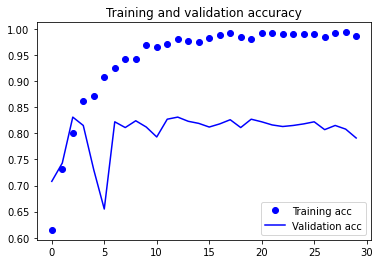

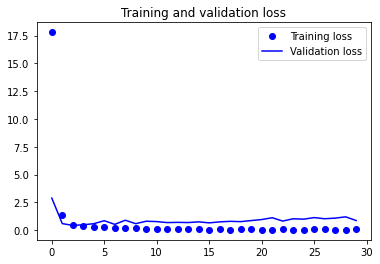

In [24]:
import matplotlib.pyplot as plt

acc = history_trad.history['accuracy']
val_acc = history_trad.history['val_accuracy']
loss = history_trad.history['loss']
val_loss = history_trad.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases until it reaches nearly 100% around the 15 epoch, while our validation accuracy flattens around 80% accuracy. Our validation loss reaches its minimum after only the first few epochs then stalls slowly increasing, while the training loss keeps decreasing until it reaches nearly 0. Because we only have relatively few training samples, overfitting is going to be our number one concern. To adress this we will look into the common techniques to help mitigate overfitting including dropout, weight decay (L2) and data augmentation.

## Fit Model (Convolutional NN)

In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 80s 788ms/step - loss: 0.6740 - acc: 0.5779 - val_loss: 0.5569 - val_acc: 0.7700
Epoch 2/30
100/100 [==============================] - 76s 764ms/step - loss: 0.5677 - acc: 0.7407 - val_loss: 0.4964 - val_acc: 0.7700
Epoch 3/30
100/100 [==============================] - 76s 758ms/step - loss: 0.5398 - acc: 0.7569 - val_loss: 0.4775 - val_acc: 0.7970
Epoch 4/30
100/100 [==============================] - 80s 801ms/step - loss: 0.5386 - acc: 0.7472 - val_loss: 0.7103 - val_acc: 0.6120
Epoch 5/30
100/100 [==============================] - 86s 858ms/step - loss: 0.5130 - acc: 0.7743 - val_loss: 0.4843 - val_acc: 0.7990
Epoch 6/30
100/100 [==============================] - 80s 800ms/step - loss: 0.5067 - acc: 0.7650 - val_loss: 0.4850 - val_acc: 0.7620
Epoch 7/30
100/100 [==============================] - 83s 835ms/step - loss: 0.4896 - acc: 0.7968 - val_loss: 0.4888 - val_acc: 0.7750
Epoch 8/30
100/100 [==============================] - 8

Saving model after training:

In [26]:
model.save('bb_class_conv.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

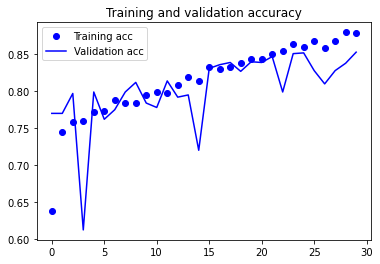

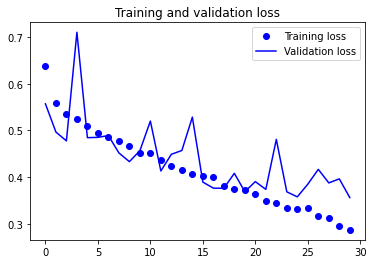

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Already we can notice a significant reduction in overfitting from the previous non-convolutional NN. This helps highlight the superior effectiveness of convnets for vision problems. The training accuracy keeps imporving linearly over time, until it reaches 85% while the validation accuracy follows it relatively closely. As we continue to work on these models we will also look into the impact of increasing the number of epochs as the above curves would lead to beleive that the model can still be trained. The next steps will include adding certain modifications in the efforts of continue mitigating overfitting.

## Using data augmentation

Overfitting is caused by having too few samples to learn from, which as a result makes us unable to train a model able to generalize to new data. Data augmentation takes the approach of generating more training data from existing training samples, via a number of random transformations that yield believable-looking images. This allows for when we train our model, it will never see the exact same picture twice. This helps the model get exposed to more aspects of the data allowing it to generalize better. 

In [28]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Let's take a look at our augmented images:

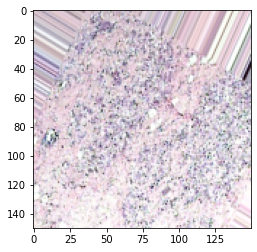

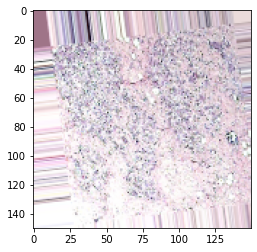

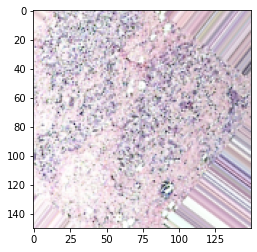

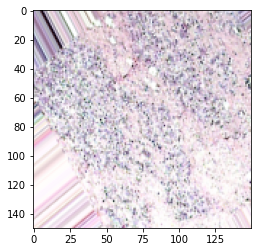

In [29]:

# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_benign_dir, fname) for fname in os.listdir(train_benign_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, reducing overfitting but not eliminating it completly. In addition, we will also add a Dropout layer to our model, right before the densely-connected classifier.

In [2]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Let's train our network using data augmentation and dropout:

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [33]:
steps_per_epoch = len(train_generator)//5
steps_per_epoch

20

In [34]:
validation_steps = len(validation_generator)//5 
validation_steps

10

In [35]:
history = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 92s 909ms/step - loss: 0.6743 - acc: 0.5814 - val_loss: 0.5272 - val_acc: 0.7410
Epoch 2/30
100/100 [==============================] - 95s 952ms/step - loss: 0.5583 - acc: 0.7222 - val_loss: 0.6784 - val_acc: 0.6810
Epoch 3/30
100/100 [==============================] - 117s 1s/step - loss: 0.5335 - acc: 0.7534 - val_loss: 0.4793 - val_acc: 0.8020
Epoch 4/30
100/100 [==============================] - 115s 1s/step - loss: 0.4974 - acc: 0.7880 - val_loss: 0.6120 - val_acc: 0.7150
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5234 - acc: 0.7506 - val_loss: 0.5986 - val_acc: 0.7280
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.5177 - acc: 0.7601 - val_loss: 0.4744 - val_acc: 0.8070
Epoch 7/30
100/100 [==============================] - 116s 1s/step - loss: 0.4909 - acc: 0.7916 - val_loss: 0.4715 - val_acc: 0.7930
Epoch 8/30
100/100 [==============================] - 122s 1s/ste

Saving model after training:

In [36]:
model2.save('bb_class_conv_aug.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

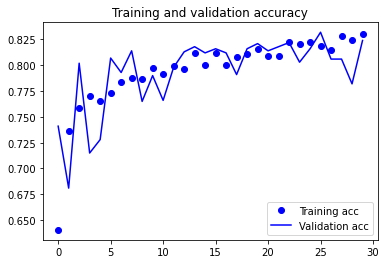

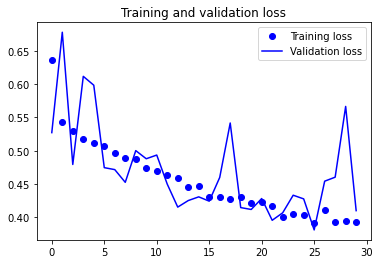

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we have significantly reduced overfitting: the training curves are rather closely tracking the validation curves except for certain spikes. By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution layer, or the number of layers in the network), we may be able to get an even better accuracy.

## Prediction

Finally we will test our three trained models on the test data (i.e. 1000 images) which they have never seen yet as to evaluate their accuracy.

### Non-Convolutional NN

In [39]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = network.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.7950000166893005


### Convolutional NN

In [40]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8700000047683716


### Convolutional NN w/ Data Augmentation

In [38]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.8389999866485596


Here we can notice how the non-convolutional NN performed the worst with an accuracy of 79.5%, followed by the Convolutional NN w/ Data Augmentation at 83.9%, and finally the Convolutional NN at 87%. It is a bit surprising that the convnet without any data augmentation performed better than with augmentation. This will definitly be further explored. One hypothesis is simply that 30 epochs was not enough for the model to properly train itself. That being said, these models provide us with a solid foundation to which we will continue our exploration into how these models can be improved. 

## Next Steps

There are still many avenues left for us to explore in order to enhance this model. We will be looking into tuning hyper-parameter and model design, investigating optimal ways to split the data into train/test to take into account the different magnifications and patients. To continue, we would like to investigate the impact of the split between benign/malignant considering that there are more than double the images available for malignant than for benign tumors (i.e. 5,429 vs. 2,480). We will look more closely into the False Positives and False Negatives through a confusion matrix to better undertsand our accuracy.

Lastly, we are still in the process of looking for new datasets that we can be manipulated to suite the format of this network in order to test its performance on more unseen data. We feel that these steps will help us come with a robust solution to our project in the final report.

Next Steps Checklist:
* Using pretrained model
* Tuning hyper-parameter and model design
* Investigate optimal way to split dataset into train/test & into benign/malignant
* Develop Confusion Matrix to better explore FP & FN
* Test models on new images obtained from different data sets